# Predicting Monthly Incomes Using Machine Learning

## 1. Problem Definition

This project aims to train a machine learning model to predict the monthly incomes of certain people.

## 2. Data

The dataset used in this project was gotten from Kaggle.
It contains over 4000 samples and 24 features

## 3. Evaluation

The evaluation metric for this project is the RMSLE (Root Mean Squared Log Error) of 0.2. This model will aim to reduce the RMSLE between the predicted values and the true values.

## 4. Features



### Importing the tools

In [1]:
# EDA tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show plots in the notebook
%matplotlib inline

# Modelling tools
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error
from joblib import dump

In [2]:
# Import the data
df = pd.read_csv("data/general_data.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


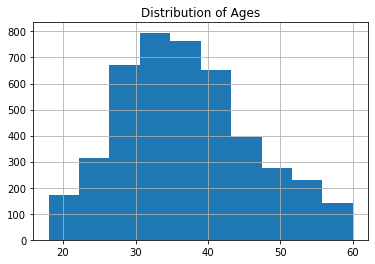

In [3]:
# Plotting the distribution of ages in the dataframe
df["Age"].hist();
plt.title("Distribution of Ages");

We can see from this histogram that majority of the workers are between the age of 30 and 40

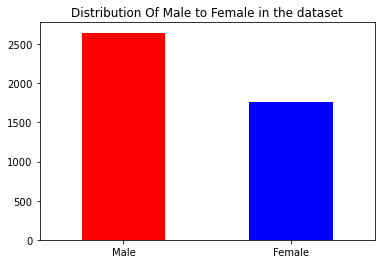

In [4]:
# Plotting the distribution of gender in the dataset
df["Gender"].value_counts().plot(kind="bar", color=["red", "blue"],
                                 title="Distribution Of Male to Female in the dataset")
plt.xticks(rotation=0);

The bar chart above shows that most of the workers are men.

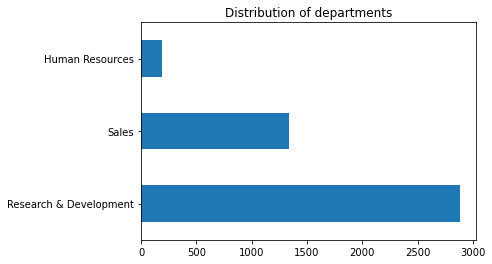

In [5]:
# Plotting the differences in departments
df["Department"].value_counts().plot(kind="barh", title="Distribution of departments");

Most of the people in this company are in the Research and Development Department

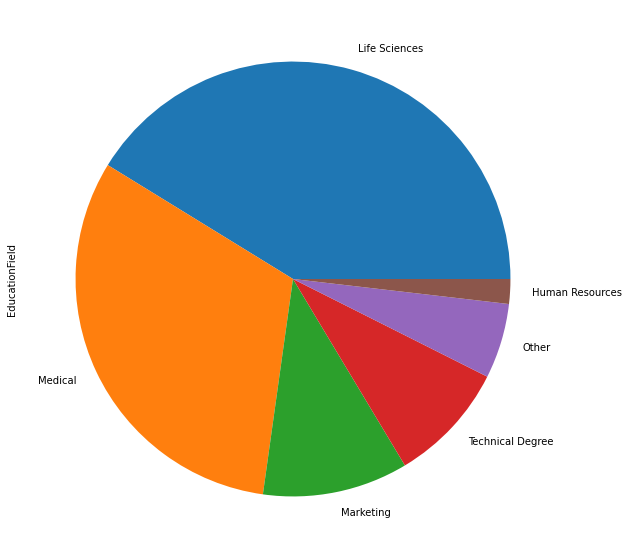

In [6]:
# Plotting the education column
df["EducationField"].value_counts().plot(kind="pie", figsize=(10, 10));

Majority of the workers were educated in Life Sciences followed closely by Medical Sciences

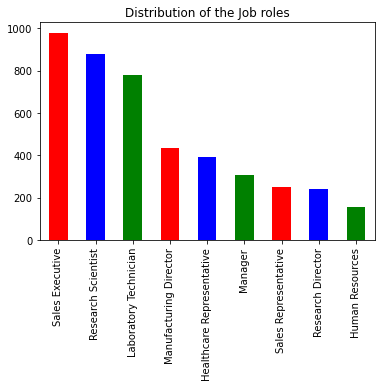

In [7]:
# Plot the job roles
df["JobRole"].value_counts().plot(kind="bar", color=["red", "blue", "green"], title="Distribution of the Job roles");

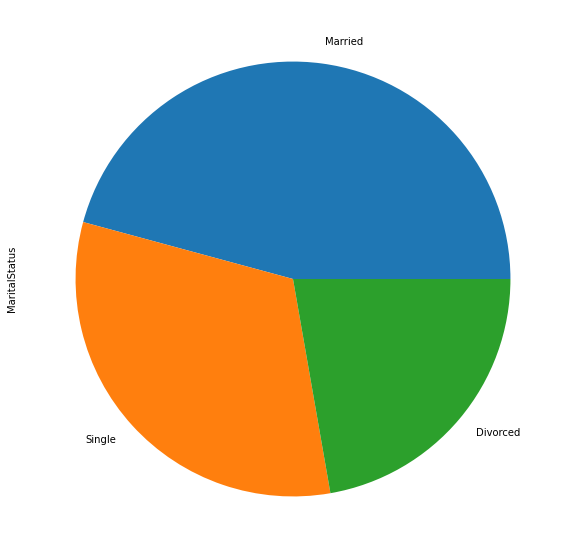

In [8]:
df["MaritalStatus"].value_counts().plot(kind="pie", figsize=(10, 10));

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
# Store the columns of the dataframe which are objects in a list
new_list = []
for columns in df.keys():
    if pd.api.types.is_object_dtype(df[columns]):
        new_list.append(columns)

In [12]:
# Turn the objects into numbers, so that the model can understand it
dummies = pd.get_dummies(df[new_list])

In [13]:
new_list

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [14]:
# Remove the columns with object datatype from the dataframe
df.drop(new_list, axis=1, inplace=True)

In [15]:
# Add the transformed columns(dummies) into the original dataframe
for key, value in dummies.items():
    df[key] = value

In [16]:
# Make the monthly income column the last column in the dataframe as it is the label for this project
monthly = {}
for key, value in df.items():
    if "Monthly" in key:
        monthly[key] = value
        df.drop(key, axis=1, inplace=True)
    

In [17]:
for key, value in monthly.items():
    df[key] = value

In [18]:
# Checking the null values
df.isna().sum()

Age                                   0
DistanceFromHome                      0
Education                             0
EmployeeCount                         0
EmployeeID                            0
JobLevel                              0
NumCompaniesWorked                   19
PercentSalaryHike                     0
StandardHours                         0
StockOptionLevel                      0
TotalWorkingYears                     9
TrainingTimesLastYear                 0
YearsAtCompany                        0
YearsSinceLastPromotion               0
YearsWithCurrManager                  0
Attrition_No                          0
Attrition_Yes                         0
BusinessTravel_Non-Travel             0
BusinessTravel_Travel_Frequently      0
BusinessTravel_Travel_Rarely          0
Department_Human Resources            0
Department_Research & Development     0
Department_Sales                      0
EducationField_Human Resources        0
EducationField_Life Sciences          0


In [19]:
# Fill the empty values with 1
df.fillna(1, inplace=True)

In [20]:
df.isna().sum()

Age                                  0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeID                           0
JobLevel                             0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition_No                         0
Attrition_Yes                        0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing 

Now that we're are done with data analysis and cleaning, we can start modelling

## Modelling

In [21]:
# Split the data into X(data) and y(labels)
X = df.drop(["MonthlyIncome", "Over18_Y", "EmployeeID"], axis=1)
y = df["MonthlyIncome"]

In [22]:
# Split the data into the training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Create a function to train and score the models to be used
def fit_score(estimators, train_data, train_labels, test_data, test_labels):
    """
    Train models and returns the RMSLE and the R^2 scores of the models
    estimators : A dictionary containing the models to be trained
    train_data : The data which will be used to train the models
    train_labels : The labels for the training data
    test_data : The data which will be used to test the models
    test_labels : The lebels for the test_data
    """
    
    # Setup a random seed
    np.random.seed(7)
    
    # Create empty dictionaries to store the RMSLE and the coefficient of determination scores of the models
    RMSLE_scores = {}
    scores = {}
    
    
    # Loop through the models in the estimators dictionary and train them
    for key, value in estimators.items():
        value.fit(train_data, train_labels)
        
        # Predict from the test data
        predictions = value.predict(test_data)
        
        # Score the models based on the RMSLE and the coefficirnt of determination metrics
        RMSLE = np.sqrt(mean_squared_log_error(test_labels, predictions))
        score = value.score(X_test, y_test)
        
        # Store the scores in the scores dictionary
        scores[key] = f"{score * 100:.2f}%"
        RMSLE_scores[key] = RMSLE 
        
        
    return scores, RMSLE_scores

In [24]:
# Create a dictionary to store models to be used
rf = RandomForestRegressor()
xgb = XGBRegressor()
cat_boost = CatBoostRegressor()
ridge = Ridge()
lasso = Lasso()
xgb_rf = XGBRFRegressor()

models = {
    "Random Forest Regressor": rf,
    "Cat Boost Regressor": cat_boost,
    "XGB Regressor": xgb,
    "Ridge Regressor": ridge,
    "Lasso Regressor": lasso,
    "XGB Random Forest Regressor": xgb_rf
}

In [25]:
# Fit and score the models
model_scores, RMSLE_scores = fit_score(models, X_train, y_train, X_test, y_test)

Learning rate set to 0.04885
0:	learn: 46533.3683485	total: 93.7ms	remaining: 1m 33s
1:	learn: 46435.9621472	total: 100ms	remaining: 50.1s
2:	learn: 46348.0847062	total: 107ms	remaining: 35.7s
3:	learn: 46255.3488650	total: 114ms	remaining: 28.5s
4:	learn: 46151.9205858	total: 121ms	remaining: 24.1s
5:	learn: 46048.9349497	total: 129ms	remaining: 21.3s
6:	learn: 45996.7267098	total: 136ms	remaining: 19.3s
7:	learn: 45908.3570762	total: 143ms	remaining: 17.8s
8:	learn: 45796.3415926	total: 150ms	remaining: 16.5s
9:	learn: 45673.2000963	total: 156ms	remaining: 15.5s
10:	learn: 45595.0885493	total: 163ms	remaining: 14.7s
11:	learn: 45456.8040491	total: 175ms	remaining: 14.4s
12:	learn: 45383.0817610	total: 185ms	remaining: 14.1s
13:	learn: 45304.8712616	total: 195ms	remaining: 13.7s
14:	learn: 45197.1886372	total: 207ms	remaining: 13.6s
15:	learn: 45108.0943028	total: 214ms	remaining: 13.2s
16:	learn: 45027.5815376	total: 223ms	remaining: 12.9s
17:	learn: 44948.2988004	total: 229ms	remain

168:	learn: 35992.7397832	total: 1.45s	remaining: 7.12s
169:	learn: 35959.1207692	total: 1.45s	remaining: 7.1s
170:	learn: 35904.4995897	total: 1.46s	remaining: 7.09s
171:	learn: 35869.2972262	total: 1.47s	remaining: 7.08s
172:	learn: 35790.0690088	total: 1.48s	remaining: 7.07s
173:	learn: 35745.6650737	total: 1.49s	remaining: 7.07s
174:	learn: 35660.9929855	total: 1.5s	remaining: 7.06s
175:	learn: 35601.4154089	total: 1.5s	remaining: 7.05s
176:	learn: 35547.7276014	total: 1.51s	remaining: 7.04s
177:	learn: 35477.7260884	total: 1.52s	remaining: 7.03s
178:	learn: 35420.2648703	total: 1.53s	remaining: 7.02s
179:	learn: 35352.0192494	total: 1.54s	remaining: 7.01s
180:	learn: 35309.0123660	total: 1.55s	remaining: 7s
181:	learn: 35247.1148432	total: 1.55s	remaining: 6.99s
182:	learn: 35205.9236233	total: 1.56s	remaining: 6.98s
183:	learn: 35151.4073474	total: 1.57s	remaining: 6.97s
184:	learn: 35069.7437837	total: 1.58s	remaining: 6.96s
185:	learn: 35009.2363789	total: 1.59s	remaining: 6.95

320:	learn: 28823.8214266	total: 2.8s	remaining: 5.93s
321:	learn: 28775.7714544	total: 2.81s	remaining: 5.92s
322:	learn: 28756.4849738	total: 2.82s	remaining: 5.91s
323:	learn: 28736.2167748	total: 2.83s	remaining: 5.91s
324:	learn: 28704.3655340	total: 2.84s	remaining: 5.9s
325:	learn: 28656.6111891	total: 2.85s	remaining: 5.9s
326:	learn: 28622.0704140	total: 2.86s	remaining: 5.89s
327:	learn: 28589.3762031	total: 2.87s	remaining: 5.89s
328:	learn: 28569.1722098	total: 2.88s	remaining: 5.88s
329:	learn: 28533.2919074	total: 2.89s	remaining: 5.87s
330:	learn: 28497.3429294	total: 2.9s	remaining: 5.86s
331:	learn: 28445.4142202	total: 2.91s	remaining: 5.85s
332:	learn: 28399.6199134	total: 2.92s	remaining: 5.84s
333:	learn: 28379.3538168	total: 2.92s	remaining: 5.83s
334:	learn: 28352.8297815	total: 2.93s	remaining: 5.82s
335:	learn: 28301.6124291	total: 2.94s	remaining: 5.81s
336:	learn: 28255.9047031	total: 2.95s	remaining: 5.8s
337:	learn: 28227.3842168	total: 2.95s	remaining: 5.7

491:	learn: 23495.6002836	total: 3.98s	remaining: 4.11s
492:	learn: 23464.5415101	total: 3.98s	remaining: 4.1s
493:	learn: 23444.2405149	total: 3.99s	remaining: 4.09s
494:	learn: 23404.4491635	total: 4s	remaining: 4.08s
495:	learn: 23390.7221895	total: 4.01s	remaining: 4.07s
496:	learn: 23372.3848628	total: 4.01s	remaining: 4.06s
497:	learn: 23345.5334705	total: 4.02s	remaining: 4.05s
498:	learn: 23299.0862721	total: 4.03s	remaining: 4.04s
499:	learn: 23261.4015427	total: 4.03s	remaining: 4.03s
500:	learn: 23233.9028626	total: 4.04s	remaining: 4.02s
501:	learn: 23197.8342403	total: 4.05s	remaining: 4.01s
502:	learn: 23188.0089683	total: 4.05s	remaining: 4s
503:	learn: 23152.4627226	total: 4.06s	remaining: 4s
504:	learn: 23139.9440163	total: 4.07s	remaining: 3.98s
505:	learn: 23099.9532979	total: 4.07s	remaining: 3.98s
506:	learn: 23087.2561126	total: 4.08s	remaining: 3.96s
507:	learn: 23048.4439940	total: 4.08s	remaining: 3.96s
508:	learn: 23005.8500348	total: 4.09s	remaining: 3.94s
50

663:	learn: 19142.8226938	total: 5.12s	remaining: 2.59s
664:	learn: 19113.1698737	total: 5.13s	remaining: 2.58s
665:	learn: 19099.9018508	total: 5.14s	remaining: 2.58s
666:	learn: 19073.0428256	total: 5.14s	remaining: 2.57s
667:	learn: 19039.7685516	total: 5.15s	remaining: 2.56s
668:	learn: 19013.1729732	total: 5.16s	remaining: 2.55s
669:	learn: 18984.7829949	total: 5.17s	remaining: 2.54s
670:	learn: 18963.6129765	total: 5.17s	remaining: 2.54s
671:	learn: 18935.2048192	total: 5.18s	remaining: 2.53s
672:	learn: 18912.7913560	total: 5.19s	remaining: 2.52s
673:	learn: 18888.5924468	total: 5.19s	remaining: 2.51s
674:	learn: 18864.0303023	total: 5.2s	remaining: 2.5s
675:	learn: 18846.9478726	total: 5.21s	remaining: 2.49s
676:	learn: 18827.3820568	total: 5.21s	remaining: 2.49s
677:	learn: 18804.6465644	total: 5.22s	remaining: 2.48s
678:	learn: 18767.4356419	total: 5.22s	remaining: 2.47s
679:	learn: 18739.2483527	total: 5.23s	remaining: 2.46s
680:	learn: 18710.2585611	total: 5.24s	remaining: 

834:	learn: 15733.2827508	total: 6.27s	remaining: 1.24s
835:	learn: 15708.0683277	total: 6.27s	remaining: 1.23s
836:	learn: 15686.9620079	total: 6.28s	remaining: 1.22s
837:	learn: 15664.6241506	total: 6.29s	remaining: 1.22s
838:	learn: 15644.4553290	total: 6.29s	remaining: 1.21s
839:	learn: 15623.0324244	total: 6.3s	remaining: 1.2s
840:	learn: 15607.4260057	total: 6.31s	remaining: 1.19s
841:	learn: 15595.4294188	total: 6.31s	remaining: 1.18s
842:	learn: 15565.0248849	total: 6.32s	remaining: 1.18s
843:	learn: 15558.0273347	total: 6.33s	remaining: 1.17s
844:	learn: 15550.5388346	total: 6.33s	remaining: 1.16s
845:	learn: 15538.3986722	total: 6.34s	remaining: 1.15s
846:	learn: 15525.0757761	total: 6.35s	remaining: 1.15s
847:	learn: 15506.6522010	total: 6.35s	remaining: 1.14s
848:	learn: 15485.0726111	total: 6.37s	remaining: 1.13s
849:	learn: 15470.3786857	total: 6.38s	remaining: 1.13s
850:	learn: 15456.1726745	total: 6.39s	remaining: 1.12s
851:	learn: 15449.7077501	total: 6.39s	remaining: 

992:	learn: 13506.3586489	total: 7.42s	remaining: 52.3ms
993:	learn: 13492.6306331	total: 7.43s	remaining: 44.8ms
994:	learn: 13480.1822512	total: 7.43s	remaining: 37.4ms
995:	learn: 13468.9838298	total: 7.44s	remaining: 29.9ms
996:	learn: 13456.8353385	total: 7.45s	remaining: 22.4ms
997:	learn: 13446.4310207	total: 7.46s	remaining: 14.9ms
998:	learn: 13423.2328940	total: 7.46s	remaining: 7.47ms
999:	learn: 13417.4584698	total: 7.47s	remaining: 0us


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [26]:
model_scores

{'Random Forest Regressor': '89.69%',
 'Cat Boost Regressor': '81.22%',
 'XGB Regressor': '93.91%',
 'Ridge Regressor': '1.41%',
 'Lasso Regressor': '1.41%',
 'XGB Random Forest Regressor': '14.83%'}

In [27]:
RMSLE_scores

{'Random Forest Regressor': 0.2570748231263086,
 'Cat Boost Regressor': 0.35901257423493205,
 'XGB Regressor': 0.19754045880789983,
 'Ridge Regressor': 0.6992331232870448,
 'Lasso Regressor': 0.6992291741421908,
 'XGB Random Forest Regressor': 0.6568047258515703}

In [28]:
for key, value in model_scores.items():
    value = float(value[:-1])
    model_scores[key] = value

In [29]:
model_scores_df = pd.DataFrame(model_scores, index=["R^2 Scores"])
RMSLE_df = pd.DataFrame(RMSLE_scores, index=["RMSLE Scores"])

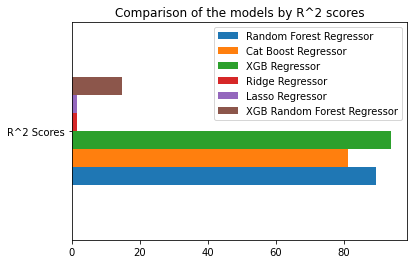

In [30]:
model_scores_df.plot(kind="barh", title="Comparison of the models by R^2 scores");

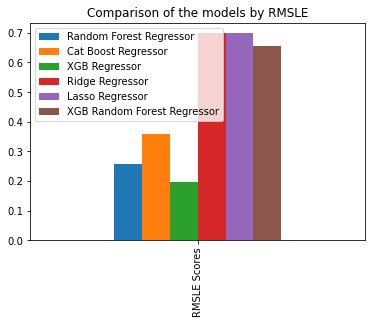

In [31]:
RMSLE_df.plot(kind="bar", title="Comparison of the models by RMSLE");

The XGBRegressor clearly outdoes all other models on both evaluation metrics, let's try to improve this model

## Improving the model

In [32]:
# Create a geid for the RandomizedSearchCV
grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": np.arange(10, 100, 10),
    "colsample_bylevel": [0.5, 1, 2, 3, 4, 5],
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
}

In [41]:
# Run a randomized search with a cross-validation of 5
%time
np.random.seed(7)
xgb_2 = RandomizedSearchCV(XGBRegressor(), grid, cv=5, verbose=True)
xgb_2.fit(X_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 433, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 736, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 433, in inner_f
    return f(**kwargs)
  File "C:\ProgramDat

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [42]:
# Check the best parameters of the new model
xgb_2.best_params_

{'n_estimators': 70,
 'max_depth': 60,
 'learning_rate': 0.07,
 'colsample_bylevel': 0.5}

In [43]:
# Check the scores
y_preds = xgb_2.predict(X_test)
score = xgb_2.score(X_test, y_test)
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_preds))
score, RMSLE

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


(0.9675944304397301, 0.10775023600244948)

**The new model trained with RandomizedSearchCV has hit the evaluation metric**

## Saving the model

In [44]:
dump(xgb_2, "models/monthly-income-predictor.joblib")

['models/monthly-income-predictor.joblib']